In [2]:
pip install torch_geometric


   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------------------------- ------------ 0.8/1.1 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 4.1 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
import networkx as nx


e:\PythonProject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dataset = Planetoid(root='data/Cora', name='Cora')
data = dataset[0]
print(data)

Processing...


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


Done!


In [5]:
class Net(torch.nn.Module):
    def __init__(self, in_ch, hid_ch, out_ch):
        super(Net, self).__init__()
        self.conv1 = GCNConv(in_ch, hid_ch)
        self.conv2 = GCNConv(hid_ch, out_ch)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [7]:
in_ch = dataset.num_features
hid_ch = 16
out_ch = dataset.num_classes
lr = 0.01
epochs = 300
     

In [8]:
model = Net(in_ch, hid_ch, out_ch)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


In [9]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

In [10]:
model.eval()
_, pred = model(data.x, data.edge_index).max(dim=1)

In [12]:
Net(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)

SyntaxError: invalid syntax (1859758647.py, line 2)

In [13]:
with torch.no_grad():
    logits = model(data.x, data.edge_index)
    pred = logits.argmax(dim=1)
    correct = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item()
    accuracy = correct / data.test_mask.sum().item()
    print(f"Test Acc: {accuracy:.4f}")

Test Acc: 0.7790


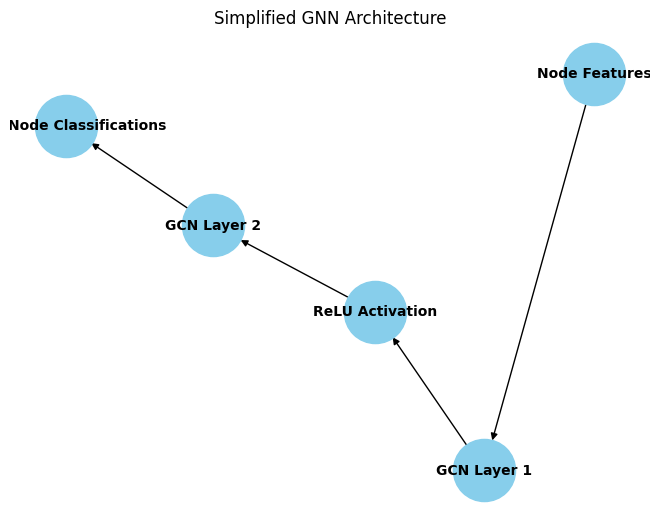

In [14]:

G = nx.DiGraph()


G.add_node("Node Features")
G.add_node("GCN Layer 1")
G.add_node("ReLU Activation")
G.add_node("GCN Layer 2")
G.add_node("Final Node Classifications")


G.add_edge("Node Features", "GCN Layer 1")
G.add_edge("GCN Layer 1", "ReLU Activation")
G.add_edge("ReLU Activation", "GCN Layer 2")
G.add_edge("GCN Layer 2", "Final Node Classifications")


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold")
plt.title("Simplified GNN Architecture")
plt.show()

     


Text(0.5, 1.0, 'Simplified GNN Architecture')

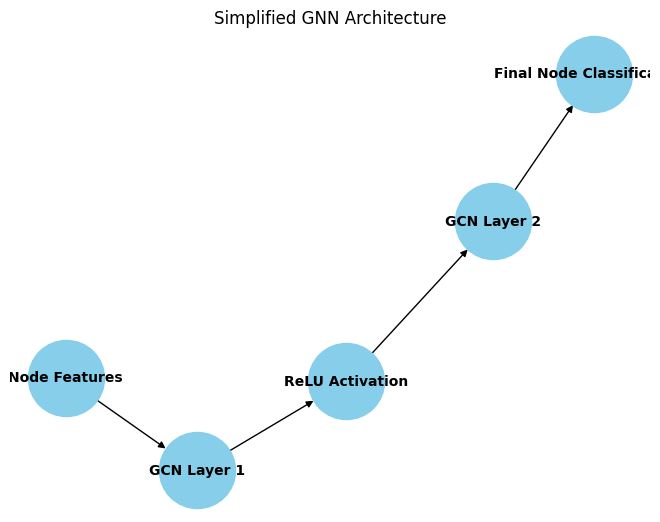

In [16]:

G = nx.DiGraph()
layers = ["Node Features", "GCN Layer 1", "ReLU Activation", "GCN Layer 2", "Final Node Classifications"]
for i in range(len(layers) - 1):
    G.add_edge(layers[i], layers[i + 1])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold")
plt.title("Simplified GNN Architecture")

Text(0.5, 1.0, 'Graph Labels')

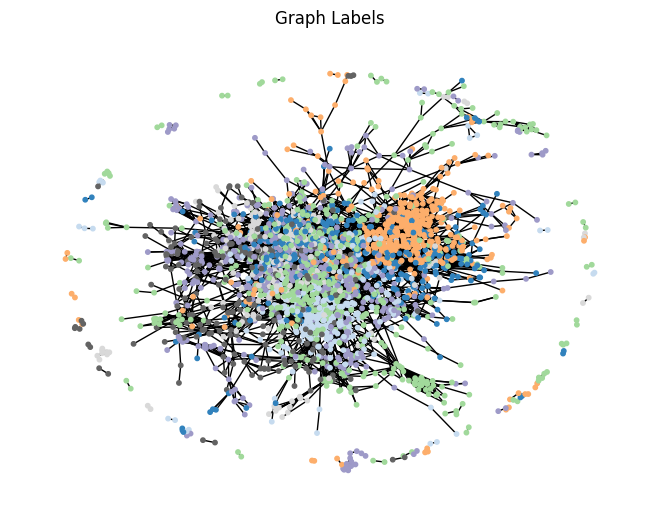

In [17]:

G = nx.Graph()
G.add_nodes_from(range(data.num_nodes))
G.add_edges_from(data.edge_index.t().tolist())

pos = nx.spring_layout(G)
node_colors = pred.cpu().numpy()


nx.draw(G, pos, node_size=10, node_color=node_colors, cmap=plt.cm.tab20c)
plt.title('Graph Labels')


In [18]:
model.eval()
_, pred = model(data.x, data.edge_index).max(dim=1)